In [1]:
import pandas as pd
import numpy as np

### Import Raw Data File and Process it 

In [2]:
raw_data_1 = pd.read_excel("Raw Data.xlsx")

In [3]:
raw_data_1.rename(columns={"Coupon (%)": "Coupon"}, inplace=True)
raw_data_1["Coupon"] = raw_data_1["Coupon"] * 100

In [4]:
raw_data_1.head()

,ISIN,Coupon,Issue date,Maturity date,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,Coupon Payment Date
0,CA135087P659,3.75,2022-11-02,2025-02-01,100.03,100.01,100.03,100.02,100.00,100.02,100.01,100.02,100.00,100.00,2025-02-01
1,CA135087K528,1.25,2019-10-11,2025-03-01,99.73,99.73,99.74,99.73,99.74,99.73,99.73,99.77,99.78,99.80,2025-03-01
2,CA135087N340,1.50,2022-01-24,2025-04-01,99.64,99.63,99.63,99.63,99.64,99.64,99.64,99.66,99.67,99.70,2025-04-01
3,CA135087Q319,3.75,2023-02-10,2025-05-01,100.22,100.22,100.21,100.21,100.17,100.16,100.15,99.89,99.89,99.89,2025-05-01
4,CA135087VH40,9.00,1994-08-02,2025-06-01,102.41,102.31,102.37,102.27,102.25,102.16,102.14,102.12,102.16,102.17,2025-06-01


### We will be selecting 11 bonds for our various calculations.

In [5]:
selected_bonds_ISIN = ["CA135087K528", "CA135087K940", "CA135087L518", "CA135087L930", "CA135087M847", 
                      "CA135087N837", "CA135087P576", "CA135087Q491", "CA135087Q988", "CA135087R895", 
                       "CA135087S471"]

In [6]:
selected_bonds = raw_data_1[raw_data_1['ISIN'].isin(selected_bonds_ISIN)].copy()

In [7]:
selected_bonds.head()

,ISIN,Coupon,Issue date,Maturity date,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,Coupon Payment Date
1,CA135087K528,1.25,2019-10-11,2025-03-01,99.73,99.73,99.74,99.73,99.74,99.73,99.73,99.77,99.78,99.80,2025-03-01
7,CA135087K940,0.50,2020-04-03,2025-09-01,98.40,98.41,98.40,98.42,98.37,98.36,98.36,98.40,98.47,98.50,2025-03-01
11,CA135087L518,0.25,2020-10-09,2026-03-01,96.99,96.98,96.97,97.00,96.90,96.91,96.80,96.90,97.01,97.06,2025-03-01
16,CA135087L930,1.00,2021-04-16,2026-09-01,97.01,96.99,97.00,97.03,96.86,96.77,96.71,96.85,97.03,97.07,2025-03-01
19,CA135087M847,1.25,2021-10-15,2027-03-01,96.62,96.59,96.58,96.63,96.39,96.28,96.19,96.36,96.60,96.64,2025-03-01


### Add a column for the last coupon payment date 

In [8]:
# Calculate 6 months before the next coupon payment date
six_months_before_coupon = selected_bonds["Coupon Payment Date"] - pd.DateOffset(months=6)

# If the issue date is less than 6 months ago, use the issue date, else, use six_months_before_coupon
selected_bonds["Last Coupon Payment Date"] = np.where(
    selected_bonds["Issue date"] > six_months_before_coupon, 
    selected_bonds["Issue date"],  
    six_months_before_coupon)

In [9]:
selected_bonds.head()

,ISIN,Coupon,Issue date,Maturity date,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,Coupon Payment Date,Last Coupon Payment Date
1,CA135087K528,1.25,2019-10-11,2025-03-01,99.73,99.73,99.74,99.73,99.74,99.73,99.73,99.77,99.78,99.80,2025-03-01,2024-09-01
7,CA135087K940,0.50,2020-04-03,2025-09-01,98.40,98.41,98.40,98.42,98.37,98.36,98.36,98.40,98.47,98.50,2025-03-01,2024-09-01
11,CA135087L518,0.25,2020-10-09,2026-03-01,96.99,96.98,96.97,97.00,96.90,96.91,96.80,96.90,97.01,97.06,2025-03-01,2024-09-01
16,CA135087L930,1.00,2021-04-16,2026-09-01,97.01,96.99,97.00,97.03,96.86,96.77,96.71,96.85,97.03,97.07,2025-03-01,2024-09-01
19,CA135087M847,1.25,2021-10-15,2027-03-01,96.62,96.59,96.58,96.63,96.39,96.28,96.19,96.36,96.60,96.64,2025-03-01,2024-09-01


### Add a List of the time till the next coupon payments for each bond   

In [10]:
# List of all collection dates
collection_dates = ["2025-01-06", "2025-01-07", "2025-01-08", "2025-01-09", "2025-01-10", 
                   "2025-01-13", "2025-01-14", "2025-01-15", "2025-01-16", "2025-01-17"]

def get_payment_times(today, next_coupon_date, maturity_date, freq=2):
    # Start a list of payment dates that begins with the next coupon date
    payment_dates = []
    current_date = next_coupon_date
    
    # Generate payment dates until maturity
    while current_date <= maturity_date:
        payment_dates.append(current_date)
        current_date += pd.DateOffset(months=12 / freq)
    
    # Calculate payment times in years from date of collection ('today')
    payment_times = [round((date - today).days / 365.0, 6) for date in payment_dates]
    return payment_times

# Loop through each collection date
# Create a separate column for Payment Times
for date in collection_dates:
    today = pd.to_datetime(date)
    column_name = f"Payment Times ({date})"
    
    selected_bonds[column_name] = selected_bonds.apply(
        lambda row: get_payment_times(today, row["Coupon Payment Date"], row["Maturity date"], freq=2),
        axis=1)

In [11]:
selected_bonds.head()

,ISIN,Coupon,Issue date,Maturity date,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,...,Payment Times (2025-01-06),Payment Times (2025-01-07),Payment Times (2025-01-08),Payment Times (2025-01-09),Payment Times (2025-01-10),Payment Times (2025-01-13),Payment Times (2025-01-14),Payment Times (2025-01-15),Payment Times (2025-01-16),Payment Times (2025-01-17)
1,CA135087K528,1.25,2019-10-11,2025-03-01,99.73,99.73,99.74,99.73,99.74,99.73,...,[0.147945],[0.145205],[0.142466],[0.139726],[0.136986],[0.128767],[0.126027],[0.123288],[0.120548],[0.117808]
7,CA135087K940,0.50,2020-04-03,2025-09-01,98.40,98.41,98.40,98.42,98.37,98.36,...,"[0.147945, 0.652055]","[0.145205, 0.649315]","[0.142466, 0.646575]","[0.139726, 0.643836]","[0.136986, 0.641096]","[0.128767, 0.632877]","[0.126027, 0.630137]","[0.123288, 0.627397]","[0.120548, 0.624658]","[0.117808, 0.621918]"
11,CA135087L518,0.25,2020-10-09,2026-03-01,96.99,96.98,96.97,97.00,96.90,96.91,...,"[0.147945, 0.652055, 1.147945]","[0.145205, 0.649315, 1.145205]","[0.142466, 0.646575, 1.142466]","[0.139726, 0.643836, 1.139726]","[0.136986, 0.641096, 1.136986]","[0.128767, 0.632877, 1.128767]","[0.126027, 0.630137, 1.126027]","[0.123288, 0.627397, 1.123288]","[0.120548, 0.624658, 1.120548]","[0.117808, 0.621918, 1.117808]"
16,CA135087L930,1.00,2021-04-16,2026-09-01,97.01,96.99,97.00,97.03,96.86,96.77,...,"[0.147945, 0.652055, 1.147945, 1.652055]","[0.145205, 0.649315, 1.145205, 1.649315]","[0.142466, 0.646575, 1.142466, 1.646575]","[0.139726, 0.643836, 1.139726, 1.643836]","[0.136986, 0.641096, 1.136986, 1.641096]","[0.128767, 0.632877, 1.128767, 1.632877]","[0.126027, 0.630137, 1.126027, 1.630137]","[0.123288, 0.627397, 1.123288, 1.627397]","[0.120548, 0.624658, 1.120548, 1.624658]","[0.117808, 0.621918, 1.117808, 1.621918]"
19,CA135087M847,1.25,2021-10-15,2027-03-01,96.62,96.59,96.58,96.63,96.39,96.28,...,"[0.147945, 0.652055, 1.147945, 1.652055, 2.147...","[0.145205, 0.649315, 1.145205, 1.649315, 2.145...","[0.142466, 0.646575, 1.142466, 1.646575, 2.142...","[0.139726, 0.643836, 1.139726, 1.643836, 2.139...","[0.136986, 0.641096, 1.136986, 1.641096, 2.136...","[0.128767, 0.632877, 1.128767, 1.632877, 2.128...","[0.126027, 0.630137, 1.126027, 1.630137, 2.126...","[0.123288, 0.627397, 1.123288, 1.627397, 2.123...","[0.120548, 0.624658, 1.120548, 1.624658, 2.120...","[0.117808, 0.621918, 1.117808, 1.621918, 2.117..."


## Formula to calculate the dirty price 

In [12]:
def dirty_price(clean_price, coupon, last_coupon_date, collection_date, freq=2):
    last_coupon_date = pd.to_datetime(last_coupon_date)
    collection_date = pd.to_datetime(collection_date)
    
    # Days since last coupon payment
    days_since_last_coupon = (collection_date - last_coupon_date).days

    # Days in the full coupon period
    days_in_period = 365 / freq

    # Accrued interest 
    accrued_interest = (coupon / freq) * (days_since_last_coupon / days_in_period)

    return clean_price + accrued_interest

# Question 4a 

### YTM Calculation Function

In [13]:
#Source: https://medium.com/@gennadii.turutin/how-to-calculate-yield-to-maturity-with-python-65a9a34d56f3

from scipy import optimize

class Coupon_Bond:
    def get_price(self, coupon, face_value, int_rate, payment_times, freq=2):
        # Convert payment times from years to semi-annual periods
        semi_annual_periods = [(time * freq) for time in payment_times]

        total_coupons_pv = self.get_coupons_pv(coupon, int_rate, semi_annual_periods, freq)
        face_value_pv = self.get_face_value_pv(face_value, int_rate, semi_annual_periods[-1], freq)
        return total_coupons_pv + face_value_pv

    @staticmethod
    def get_face_value_pv(face_value, int_rate, periods, freq):
        rate_per_period = int_rate / freq  
        return face_value / (1 + rate_per_period) ** periods  

    def get_coupons_pv(self, coupon, int_rate, periods, freq):
        return sum(Coupon_Bond.get_coupon_pv(coupon, int_rate, period, freq) for period in periods)

    @staticmethod
    def get_coupon_pv(coupon, int_rate, periods, freq):
        rate_per_period = int_rate / freq  
        return coupon / (1 + rate_per_period) ** periods


    def get_ytm(self, bond_price, face_value, coupon, payment_times, freq=2, estimate=0.05):
        # Convert payment times from years to semi-annual periods
        semi_annual_periods = [(time * freq) for time in payment_times]

        get_yield = lambda int_rate: self.get_price(coupon, face_value, 
                                                    int_rate, semi_annual_periods, freq) - bond_price
        ytm_semi_annual = optimize.newton(get_yield, estimate)

        return ytm_semi_annual * freq  # Convert semi-annual yield to annualized YTM

### Apply the YTM calculator to every bond across every date 

In [14]:
# Initialize the bond calculator class
bond_calculator = Coupon_Bond()

# Loop through each collection date
for date in collection_dates:
    # Column names for each date
    clean_price_column = date  
    ytm_column = f"YTM ({date})"  
    payment_times_column = f"Payment Times ({date})"  

    # Apply YTM calculation across all bonds for the given collection date
    selected_bonds[ytm_column] = selected_bonds.apply(
        lambda row: bond_calculator.get_ytm(
            bond_price=dirty_price(  
                clean_price=row[clean_price_column], 
                coupon=row["Coupon"],  
                last_coupon_date=row["Last Coupon Payment Date"],  
                collection_date=pd.to_datetime(date),  
                freq=2),
            face_value=100,  
            coupon=row["Coupon"] / 2,  
            payment_times=row[payment_times_column],  
            freq=2), axis=1)

In [15]:
selected_bonds.head()

,ISIN,Coupon,Issue date,Maturity date,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,...,YTM (2025-01-06),YTM (2025-01-07),YTM (2025-01-08),YTM (2025-01-09),YTM (2025-01-10),YTM (2025-01-13),YTM (2025-01-14),YTM (2025-01-15),YTM (2025-01-16),YTM (2025-01-17)
1,CA135087K528,1.25,2019-10-11,2025-03-01,99.73,99.73,99.74,99.73,99.74,99.73,...,0.031095,0.031447,0.031106,0.032192,0.031852,0.033872,0.034339,0.031561,0.031161,0.029890
7,CA135087K940,0.50,2020-04-03,2025-09-01,98.40,98.41,98.40,98.42,98.37,98.36,...,0.029845,0.029792,0.030056,0.029844,0.030749,0.031247,0.031361,0.030823,0.029789,0.029405
11,CA135087L518,0.25,2020-10-09,2026-03-01,96.99,96.98,96.97,97.00,96.90,96.91,...,0.029258,0.029412,0.029568,0.029360,0.030339,0.030450,0.031536,0.030680,0.029728,0.029330
16,CA135087L930,1.00,2021-04-16,2026-09-01,97.01,96.99,97.00,97.03,96.86,96.77,...,0.028554,0.028711,0.028679,0.028519,0.029632,0.030308,0.030727,0.029861,0.028737,0.028511
19,CA135087M847,1.25,2021-10-15,2027-03-01,96.62,96.59,96.58,96.63,96.39,96.28,...,0.028758,0.028926,0.028996,0.028771,0.029976,0.030589,0.031060,0.030237,0.029066,0.028888


### Generating the Yield Curve 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute "Time to Maturity" for each collection date
for date in collection_dates:
    today = pd.to_datetime(date)
    column_name = f"Time to Maturity ({date})"
    
    selected_bonds[column_name] = (selected_bonds["Maturity date"] - today).dt.days / 365

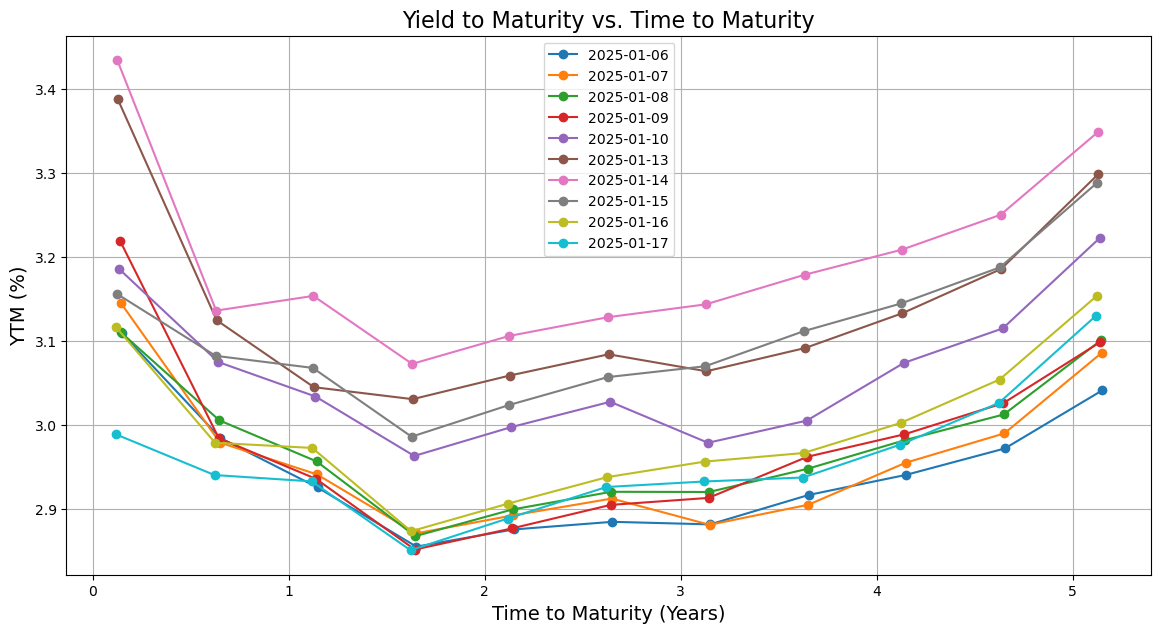

In [17]:
plt.figure(figsize=(14, 7))

for date in collection_dates:
    time_to_maturity_column = f"Time to Maturity ({date})"
    ytm_column = f"YTM ({date})"
    
    plt.plot(selected_bonds[time_to_maturity_column], selected_bonds[ytm_column] * 100, marker='o', linestyle='-',
             label=f"{date}")

plt.title("Yield to Maturity vs. Time to Maturity", fontsize=16)
plt.xlabel("Time to Maturity (Years)", fontsize=14)
plt.ylabel("YTM (%)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Question 4b 

### Bootstrapping Function 

In [18]:
def bootstrap_spot_rate_for_bond(P, annual_coupon, payment_times, known_spots, face_value=100, freq=2):
    cp = annual_coupon / freq  
    n = len(payment_times)
    
    if n == 1:
        # For a single cash flow, we can compute the rate directly.
        t_final = payment_times[0]
        S = 2 * (((cp + face_value) / P) ** (1 / (2 * t_final)) - 1)
        return S
    else:
        # Discount all earlier cash flows using known spot rates.
        pv_known = 0.0
        for t in payment_times[:-1]:
            t_round = round(t, 3)
            s = known_spots[t_round]
            discount_factor = 1 / (1 + s / freq) ** (freq * t_round)
            pv_known += cp * discount_factor
        t_final = payment_times[-1]
        final_cash = cp + face_value
        pv_remaining = P - pv_known
        S = 2 * ((final_cash / pv_remaining) ** (1 / (2 * t_final)) - 1)
        return S

### Applying the Bootstrapping Function

In [19]:
# Dictionary to store the spot curve for each collection date.
# Each spot curve is stored as a list of (maturity in years, spot rate) tuples.
spot_curves = {}

for date in collection_dates:
    payment_times_col = f"Payment Times ({date})"
    ytm_col = f"YTM ({date})"  # Column with your pre-calculated YTM values

    bonds = selected_bonds.copy()
    bonds["t_final"] = bonds[payment_times_col].apply(
        lambda lst: lst[-1] if isinstance(lst, list) and len(lst) > 0 else np.nan)
    # Sort by final payment time (shorter maturities first)
    bonds = bonds.sort_values("t_final")
    
    known_spots = {}  # Dictionary to hold bootstrapped spot rates
    spot_curve = []   # List to hold (t_final, spot rate) tuples
    
    for idx, row in bonds.iterrows():
        # Compute the dirty price for this bond at the given collection date.
        P = dirty_price(
            clean_price=row[date],
            coupon=row["Coupon"],
            last_coupon_date=row["Last Coupon Payment Date"],
            collection_date=today,
            freq=2)
        
        payment_times = row[payment_times_col]
        if not isinstance(payment_times, list) or len(payment_times) == 0:
            continue
        
        # If this bond has only one payment left, use the pre-calculated YTM.
        if len(payment_times) == 1:
            S = row[ytm_col]
        else:
            S = bootstrap_spot_rate_for_bond(P, row["Coupon"], payment_times, known_spots, face_value=100, freq=2)
        
        t_final = round(payment_times[-1], 3)
        S = round(S, 5)
        
        # Save this spot rate for bootstrapping subsequent bonds.
        known_spots[t_final] = S
        spot_curve.append((t_final, S))
    
    # Save the sorted spot curve for this collection date.
    spot_curves[date] = sorted(spot_curve, key=lambda x: x[0])

### Plotting the Spot Curve 

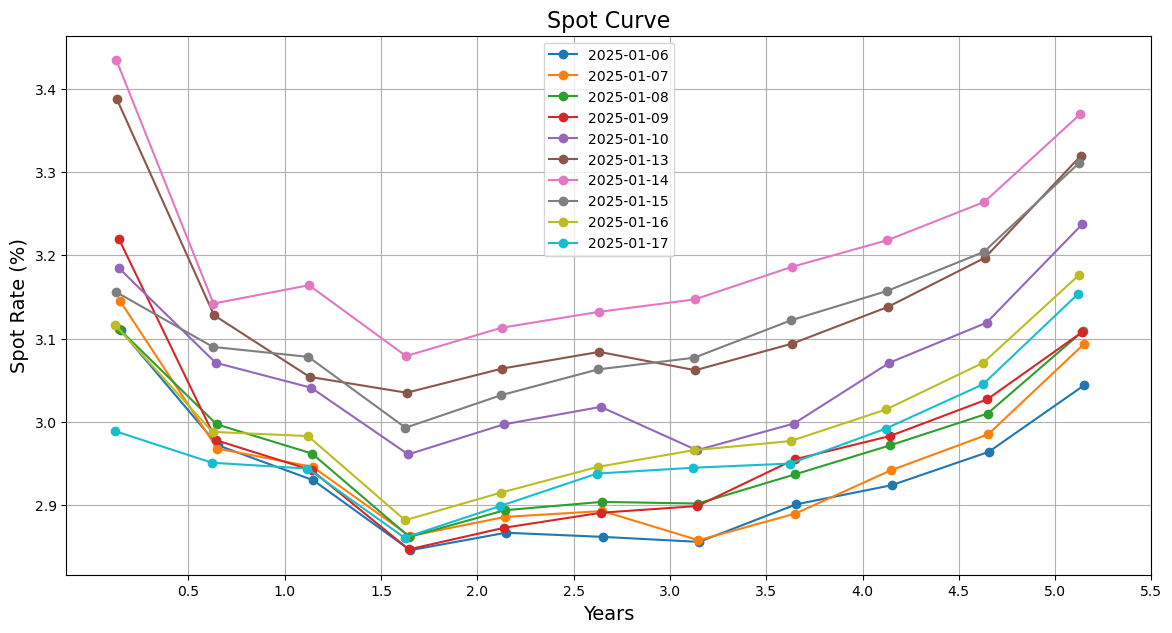

In [20]:
plt.figure(figsize=(14, 7))

for date in collection_dates:
    curve = spot_curves.get(date, [])
    if curve:
        times, spots = zip(*curve)
        spots = [s * 100 for s in spots]

        plt.plot(times, spots, marker='o', linestyle='-', label=f"{date}")

plt.title("Spot Curve", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Spot Rate (%)", fontsize=14)
plt.xticks(np.arange(0.5, max(times) + 0.5, 0.5))
plt.grid(True)
plt.legend()
plt.show()

### Interpolate to Get Annual Spot Rates 

In [21]:
# Dictionary to hold interpolated spot curves (key: collection date, 
# value: dict mapping target full-year maturities to interpolated spot rates)
interpolated_spot_curves = {}

for date, curve in spot_curves.items():
    t_values = np.array([pt for pt, s in curve])
    S_values = np.array([s for pt, s in curve])
    
    max_target = int(np.floor(t_values.max()))
    target_maturities = np.arange(1, max_target + 1)
    
    interp_dict = {}
    for T in target_maturities:
        # If T exactly matches a known maturity, take that rate directly.
        if T in t_values:
            interp_dict[T] = S_values[np.where(t_values == T)[0][0]]
        else:
            # Find the index of the first t_value that is >= T
            index = np.searchsorted(t_values, T)
            # Check if T falls within the available range
            if index == 0 or index == len(t_values):
                # If T is out of bounds, you could choose to skip it (or extrapolate).
                continue
            # Get the two bracketing points:
            t_lower = t_values[index - 1]
            t_upper = t_values[index]
            S_lower = S_values[index - 1]
            S_upper = S_values[index]
            # Linear interpolation:
            interp_S = S_lower + ((T - t_lower) / (t_upper - t_lower)) * (S_upper - S_lower)
            interp_dict[T] = interp_S
    interpolated_spot_curves[date] = interp_dict

### Plot the Spot Curve 

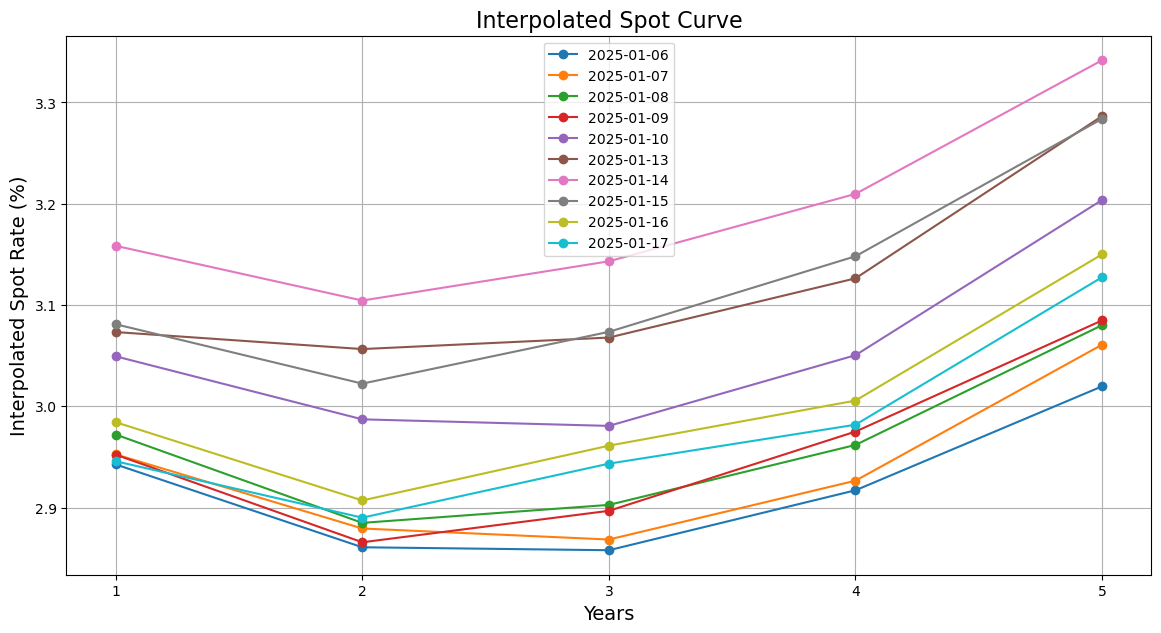

In [22]:
plt.figure(figsize=(14, 7))

for date, interp in interpolated_spot_curves.items():
    maturities = sorted(interp.keys())
    rates = [interp[m] * 100 for m in maturities]
    
    plt.plot(maturities, rates, marker='o', linestyle='-', label=f"{date}")

plt.title("Interpolated Spot Curve", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Interpolated Spot Rate (%)", fontsize=14)
plt.xticks(np.arange(1, max(maturities) + 1, 1))  
plt.grid(True)
plt.legend()
plt.show()

# Question 4c 

### Calculate the Forward Rates 

In [23]:
# Dictionary to store the forward curves for each collection date.
forward_curves = {}

for date, spot_dict in interpolated_spot_curves.items():
    if 1 not in spot_dict:
        continue
    S1 = spot_dict[1]
    
    forward_dict = {}
    for T in [2, 3, 4, 5]:
        if T not in spot_dict:
            continue
        ST = spot_dict[T]
        n = T - 1
        # Semiannual compounding forward rate formula:
        F = (( (1 + ST)**(2 * T) / (1 + S1)**(2 * 1) )**(1 / (2 * n))) - 1
        forward_dict[n] = F 
    
    forward_curves[date] = forward_dict

### Plot the Forward Curve 

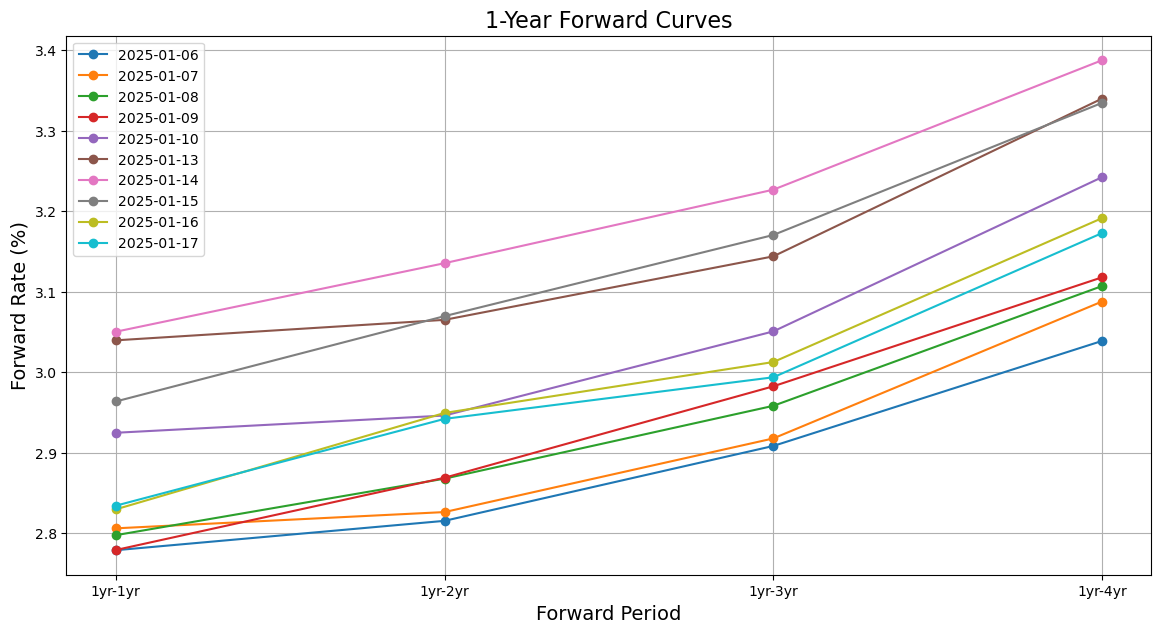

In [24]:
plt.figure(figsize=(14, 7))

for date, fwd_dict in forward_curves.items():
    if fwd_dict:
        fwd_periods = sorted(fwd_dict.keys())
        fwd_rates = [fwd_dict[n] * 100 for n in fwd_periods]
        
        # Correct x labels: "1yr-1yr", "1yr-2yr", ..., "1yr-4yr"
        x_labels = [f"1yr-{n}yr" for n in fwd_periods]

        plt.plot(fwd_periods, fwd_rates, marker='o', linestyle='-', label=f"{date}")

plt.title("1-Year Forward Curves", fontsize=16)
plt.xlabel("Forward Period", fontsize=14)
plt.ylabel("Forward Rate (%)", fontsize=14)
plt.xticks(fwd_periods, x_labels)  
plt.grid(True)
plt.legend()
plt.show()

# Question 5

## Yield Covariance Matrix  

### Interpolate YTMs to get Annual Values 

In [25]:
interpolated_ytm = {}

for date in collection_dates:
    time_col = f"Time to Maturity ({date})" 
    ytm_col  = f"YTM ({date})"               
    
    t_values   = selected_bonds[time_col].values
    ytm_values = selected_bonds[ytm_col].values
    
    # Sort the bonds by time to maturity
    sort_idx = np.argsort(t_values)
    t_values   = t_values[sort_idx]
    ytm_values = ytm_values[sort_idx]
    
    target_maturities = np.array([1, 2, 3, 4, 5])
    max_target = np.floor(np.max(t_values))
    target_maturities = target_maturities[target_maturities <= max_target]
    
    interp_dict = {}
    for T in target_maturities:
        # If T exactly exists in t_values, take that yield.
        if T in t_values:
            interp_ytm = ytm_values[np.where(t_values == T)[0][0]]
        else:
            # Find the indices bracketing T.
            idx = np.searchsorted(t_values, T)
            # Ensure T is within the range.
            if idx == 0 or idx == len(t_values):
                continue  
            t_lower = t_values[idx - 1]
            t_upper = t_values[idx]
            ytm_lower = ytm_values[idx - 1]
            ytm_upper = ytm_values[idx]
            # Linear interpolation:
            interp_ytm = ytm_lower + (T - t_lower) / (t_upper - t_lower) * (ytm_upper - ytm_lower)
        interp_dict[T] = interp_ytm
    interpolated_ytm[date] = interp_dict

In [26]:
all_maturities = sorted(list({m for d in interpolated_ytm.values() for m in d.keys()}))
ytm_interp_df = pd.DataFrame(index=collection_dates, columns=all_maturities, dtype=float)

for date in collection_dates:
    for m in all_maturities:
        ytm_interp_df.loc[date, m] = interpolated_ytm[date].get(m, np.nan)

In [27]:
ytm_interp_df

,1,2,3,4,5
2025-01-06,0.029433,0.028697,0.028828,0.029335,0.030202
2025-01-07,0.029524,0.028863,0.028906,0.029402,0.030572
2025-01-08,0.029708,0.028905,0.029205,0.029721,0.030749
2025-01-09,0.029496,0.028700,0.029110,0.029813,0.030779
2025-01-10,0.030453,0.029881,0.029926,0.030546,0.031923
2025-01-13,0.030657,0.030516,0.030693,0.031220,0.032685
2025-01-14,0.031491,0.030975,0.031396,0.032008,0.033228
2025-01-15,0.030715,0.030144,0.030667,0.031363,0.032627
2025-01-16,0.029743,0.028986,0.029520,0.029936,0.031288
2025-01-17,0.029348,0.028799,0.029313,0.029672,0.031049


### Calculate Daily Log-Returns

In [28]:
log_returns_df = np.log(ytm_interp_df.astype(float) / ytm_interp_df.astype(float).shift(1))
# Drop the first day
log_returns_df = log_returns_df.dropna()

In [29]:
log_returns_df

,1,2,3,4,5
2025-01-07,0.003084,0.005766,0.002719,0.002295,0.012187
2025-01-08,0.006233,0.001446,0.010263,0.010781,0.005788
2025-01-09,-0.007158,-0.007115,-0.003252,0.003090,0.000963
2025-01-10,0.031907,0.040327,0.027643,0.024277,0.036487
2025-01-13,0.006691,0.021023,0.025310,0.021830,0.023606
2025-01-14,0.026847,0.014944,0.022652,0.024926,0.016459
2025-01-15,-0.024950,-0.027217,-0.023503,-0.020366,-0.018249
2025-01-16,-0.032175,-0.039161,-0.038121,-0.046560,-0.041917
2025-01-17,-0.013366,-0.006481,-0.007030,-0.008861,-0.007642


### Compute the Yield Covariance Matrix 

In [30]:
cov_matrix_ytm = log_returns_df.cov()

In [31]:
new_labels = ["1 Year", "2 Year", "3 Year", "4 Year", "5 Year"]

cov_matrix_ytm.index = new_labels
cov_matrix_ytm.columns = new_labels

cov_matrix_ytm

,1 Year,2 Year,3 Year,4 Year,5 Year
1 Year,0.000465,0.000492,0.000458,0.000471,0.000468
2 Year,0.000492,0.000587,0.000526,0.000531,0.000558
3 Year,0.000458,0.000526,0.000508,0.000524,0.000512
4 Year,0.000471,0.000531,0.000524,0.000558,0.000533
5 Year,0.000468,0.000558,0.000512,0.000533,0.000551


## Forward Rates Covariance Matrix

In [32]:
all_forward_periods = sorted(list({fp for curve in forward_curves.values() for fp in curve.keys()}))

forward_df = pd.DataFrame(index=collection_dates, columns=all_forward_periods, dtype=float)

for date in collection_dates:
    for fp in all_forward_periods:
        forward_df.loc[date, fp] = forward_curves.get(date, {}).get(fp, np.nan)

forward_df

,1,2,3,4
2025-01-06,0.027790,0.028155,0.029085,0.030389
2025-01-07,0.028062,0.028264,0.029178,0.030879
2025-01-08,0.027977,0.028679,0.029583,0.031071
2025-01-09,0.027792,0.028690,0.029826,0.031179
2025-01-10,0.029249,0.029463,0.030508,0.032423
2025-01-13,0.030397,0.030651,0.031440,0.033399
2025-01-14,0.030503,0.031355,0.032268,0.033876
2025-01-15,0.029637,0.030697,0.031705,0.033346
2025-01-16,0.028297,0.029495,0.030127,0.031914
2025-01-17,0.028343,0.029421,0.029938,0.031729


### Calculate Daily Log-Returns

In [33]:
log_returns_forward = np.log(forward_df.astype(float) / forward_df.astype(float).shift(1))
# Drop the first day
log_returns_forward = log_returns_forward.dropna()

log_returns_forward

,1,2,3,4
2025-01-07,0.009730,0.003863,0.003209,0.015978
2025-01-08,-0.003033,0.014573,0.013787,0.006200
2025-01-09,-0.006613,0.000397,0.008156,0.003489
2025-01-10,0.051073,0.026569,0.022607,0.039120
2025-01-13,0.038502,0.039547,0.030097,0.029655
2025-01-14,0.003504,0.022699,0.025993,0.014163
2025-01-15,-0.028811,-0.021199,-0.017594,-0.015760
2025-01-16,-0.046260,-0.039953,-0.051053,-0.043878
2025-01-17,0.001605,-0.002499,-0.006297,-0.005827


### Compute the Forward Rates Covariance Matrix 

In [34]:
cov_matrix_forward = log_returns_forward.cov()

In [35]:
new_labels = ["1yr-1yr", "1yr-2yr", "1yr-3yr", "1yr-4yr"]

cov_matrix_forward.index = new_labels
cov_matrix_forward.columns = new_labels

cov_matrix_forward

,1yr-1yr,1yr-2yr,1yr-3yr,1yr-4yr
1yr-1yr,0.000898,0.000664,0.000642,0.000710
1yr-2yr,0.000664,0.000606,0.000611,0.000572
1yr-3yr,0.000642,0.000611,0.000653,0.000591
1yr-4yr,0.000710,0.000572,0.000591,0.000615


# Question 6 

## Eigenvectors and Eigenvalues for Yield Covariance Matrix

In [36]:
eig_values_ytm, eig_vectors_ytm = np.linalg.eig(cov_matrix_ytm)

eig_vectors_ytm_df = pd.DataFrame(eig_vectors_ytm, columns=[f"V{i+1}" for i in range(eig_vectors_ytm.shape[1])])

print("\nEigenvalues:")
print(eig_values_ytm)


Eigenvalues:
[2.56832709e-03 4.67785361e-05 4.10174473e-05 1.09058738e-05
 1.35758933e-06]


In [37]:
eig_vectors_ytm_df

,V1,V2,V3,V4,V5
0,-0.409821,-0.429094,0.770386,-0.214399,0.091998
1,-0.469660,-0.515479,-0.387351,0.317607,-0.512627
2,-0.440818,0.275968,0.047666,0.681532,0.512604
3,-0.456134,0.687441,0.144749,-0.201666,-0.507686
4,-0.457262,-0.037759,-0.482949,-0.589919,0.456336


In [38]:
# Scale each eigenvector for that the 4th component is = 1
scaled_eig_vectors = eig_vectors_ytm / eig_vectors_ytm[3, :]

# Convert to Pandas DataFrame with labeled columns
eig_vectors_ytm_df_scaled = pd.DataFrame(scaled_eig_vectors, 
                                         columns=[f"V{i+1}" for i in range(eig_vectors_ytm.shape[1])])

In [39]:
eig_vectors_ytm_df_scaled

,V1,V2,V3,V4,V5
0,0.898466,-0.624190,5.322206,1.063142,-0.181210
1,1.029653,-0.749852,-2.676014,-1.574919,1.009732
2,0.966423,0.401442,0.329301,-3.379517,-1.009688
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.002473,-0.054926,-3.336447,2.925233,-0.898855


## Eigenvectors and Eigenvalues for Forward Rates Covariance Matrix

In [40]:
eig_values_forward, eig_vectors_forward = np.linalg.eig(cov_matrix_forward)

eig_vectors_forward_df = pd.DataFrame(eig_vectors_forward, 
                                      columns=[f"V{i+1}" for i in range(eig_vectors_forward.shape[1])])

print("\nEigenvalues:")
print(eig_values_forward)


Eigenvalues:
[2.60181050e-03 1.38134443e-04 3.95262548e-06 2.72071244e-05]


In [41]:
eig_vectors_forward_df

,V1,V2,V3,V4
0,0.563967,0.702144,0.373935,-0.221601
1,0.471616,-0.326811,-0.487599,-0.658043
2,0.478888,-0.621780,0.577900,0.223803
3,0.479778,0.116524,-0.537076,0.683948


In [42]:
# Scale each eigenvector for that the 3rd component is = 1
scaled_eig_vectors = eig_vectors_forward / eig_vectors_forward[2, :]

# Convert to Pandas DataFrame with labeled columns
eig_vectors_forward_df_scaled = pd.DataFrame(scaled_eig_vectors, 
                                         columns=[f"V{i+1}" for i in range(eig_vectors_forward.shape[1])])

In [43]:
eig_vectors_forward_df_scaled

,V1,V2,V3,V4
0,1.177660,-1.129250,0.647058,-0.990165
1,0.984815,0.525606,-0.843742,-2.940284
2,1.000000,1.000000,1.000000,1.000000
3,1.001858,-0.187404,-0.929358,3.056032
